In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
fpath_raw = '~/Documents/OpenBCI_GUI/Recordings/OpenBCISession_2021-11-27_15-03-32/OpenBCI-RAW-2021-11-27_15-04-04.txt'
fpath_lsl = 'bci.log'

fs = 250 # Hz

channel_names = ['EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2', 'EXG Channel 3', 
                 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6', 'EXG Channel 7']

n_channels = len(channel_names)


In [3]:
df_raw = pd.read_csv(fpath_raw, skiprows=4)
df_raw.columns = [colname.strip() for colname in df_raw.columns]
df_raw

,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Accel Channel 0,...,Other.3,Other.4,Other.5,Other.6,Analog Channel 0,Analog Channel 1,Analog Channel 2,Timestamp,Other.7,Timestamp (Formatted)
0,0.0,24792.063211,-8803.681589,16459.601099,-29481.749771,-11053.630537,-14066.668042,-187500.022352,-187500.022352,0.016,...,255.0,48.0,16.0,0.0,0.0,0.0,0.0,1.638043e+09,0.0,2021-11-27 15:04:04.436
1,1.0,24806.591845,-8797.043121,16460.562224,-29473.770198,-11049.271947,-14060.588367,-187500.022352,-187500.022352,0.016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.638043e+09,0.0,2021-11-27 15:04:04.444
2,2.0,24839.940648,-8768.790516,16486.825524,-29436.174564,-11017.308952,-14025.116149,-187500.022352,-187500.022352,0.016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.638043e+09,0.0,2021-11-27 15:04:04.450
3,3.0,24879.771457,-8733.787684,16514.608743,-29400.791752,-10988.542257,-13994.024872,-187500.022352,-187500.022352,0.016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.638043e+09,0.0,2021-11-27 15:04:04.450
4,4.0,24916.182448,-8700.550640,16548.963374,-29364.201947,-10944.844597,-13959.491427,-187500.022352,-187500.022352,0.016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.638043e+09,0.0,2021-11-27 15:04:04.457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339662,206.0,5171.210190,-33746.641427,-8482.084689,-33819.150486,-24483.743248,-12169.831952,0.000000,-6846.696955,0.024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.638045e+09,0.0,2021-11-27 15:26:44.068
339663,207.0,5166.337510,-33740.986436,-8491.114794,-33826.034823,-24503.122211,-12180.761955,0.000000,-6849.334460,0.024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.638045e+09,0.0,2021-11-27 15:26:44.075
339664,208.0,5162.269492,-33749.144822,-8489.505469,-33829.789916,-24497.154295,-12181.454859,0.000000,-6849.714440,0.024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.638045e+09,0.0,2021-11-27 15:26:44.075
339665,209.0,5166.046937,-33750.664741,-8480.296550,-33826.928893,-24482.089219,-12175.688109,0.000000,-6843.008917,0.024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.638045e+09,0.0,2021-11-27 15:26:44.081


In [4]:
col_offset = 1
df_lsl = pd.read_csv(fpath_lsl, names=df_raw.columns.tolist()[col_offset:n_channels+col_offset])
df_lsl

,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7
0,4389.055664,-30041.236328,-1649.625854,-34033.414062,-17903.591797,-10774.994141,0.0,-41250.746094
1,4384.003906,-30044.791016,-1656.197266,-34040.007812,-17913.224609,-10779.888672,0.0,-41239.414062
2,4370.973145,-30061.687500,-1674.793823,-34055.050781,-17931.216797,-10796.965820,0.0,-41227.949219
3,4378.282227,-30057.664062,-1673.318604,-34048.500000,-17930.972656,-10791.421875,0.0,-41244.378906
4,4387.110840,-30044.632812,-1651.458618,-34033.863281,-17897.890625,-10775.417969,0.0,-41264.250000
...,...,...,...,...,...,...,...,...
12435,11136.332031,-21876.234375,5016.871582,-39977.703125,-18206.523438,-18125.968750,0.0,0.000000
12436,11116.751953,-21886.873047,5012.222168,-39983.828125,-18202.791016,-18127.623047,0.0,0.000000
12437,11099.541016,-21896.349609,5008.690430,-39994.175781,-18199.037109,-18134.082031,0.0,0.000000
12438,11092.857422,-21889.488281,5014.748047,-39984.968750,-18194.699219,-18123.263672,0.0,0.000000


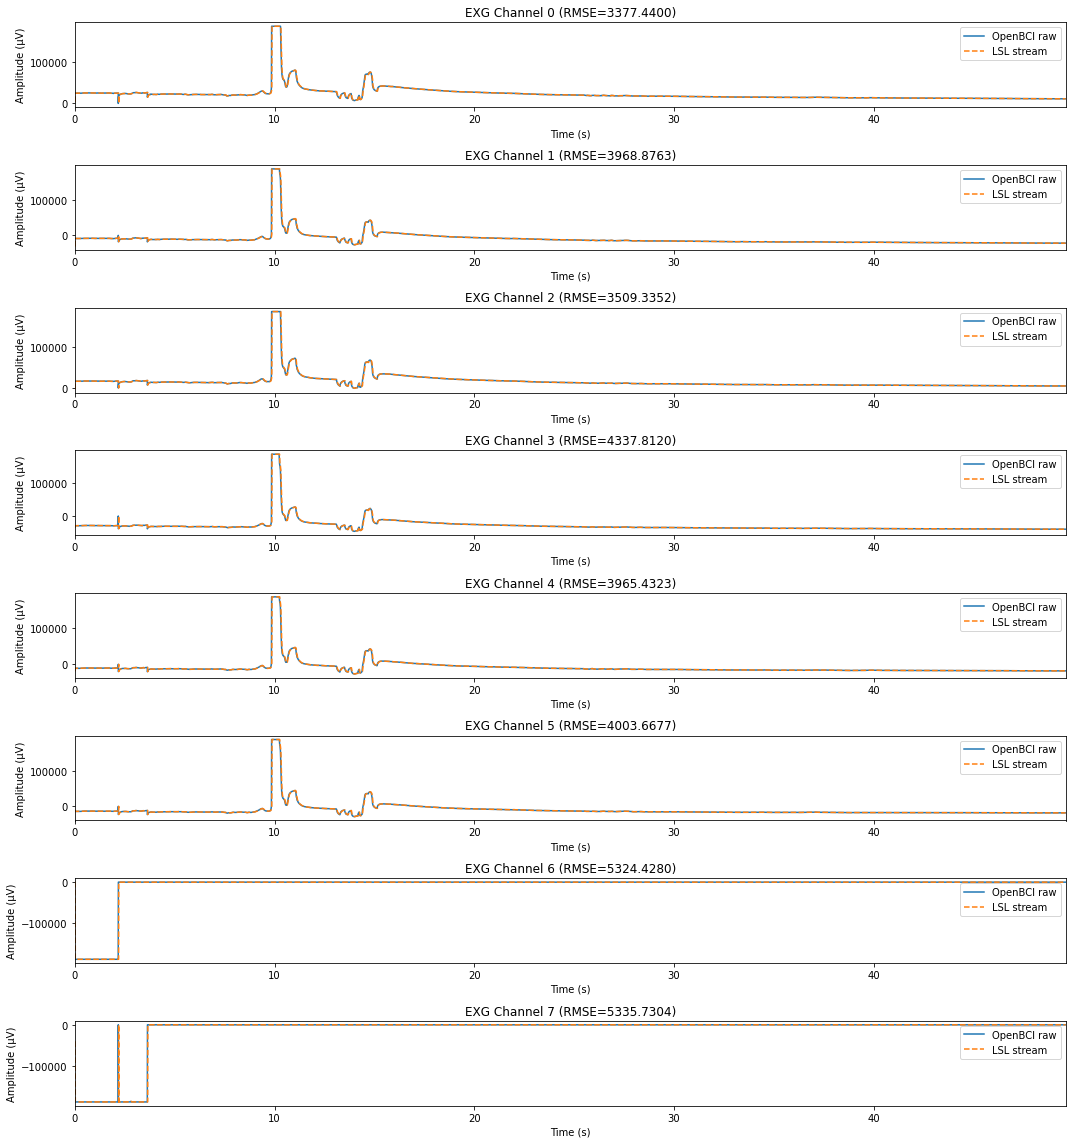

In [25]:
i_start = 0
n_samples = 12400
i_stop = i_start + n_samples
lsl_shift = 0

n_rows = n_channels

fig, axes = plt.subplots(nrows=n_rows, figsize=(15, 2*n_rows))

for ax, channel_name in zip(axes, channel_names):
    
    data_raw = df_raw.loc[i_start:i_stop, channel_name]
    data_lsl = df_lsl.loc[i_start:i_stop, channel_name]
    
    data_lsl.index = data_lsl.index + lsl_shift
    
    data_raw.index = data_raw.index / fs
    data_lsl.index = data_lsl.index / fs
    
    # root mean square error
    rmse = np.sqrt(((data_raw - data_lsl) ** 2).mean())
    
    ax.plot(data_raw, label='OpenBCI raw')
    ax.plot(data_lsl, ls='--', label='LSL stream')
    
    ax.set_xlim(left=data_raw.index[0], right=data_raw.index[-1])
    
    ax.set_title(f'{channel_name} (RMSE={rmse:.4f})')    
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude (\u03BCV)')
    
    ax.legend()

fig.tight_layout()

if lsl_shift == 0:
    fname_out = 'OpenBCI_vs_LSL.png'
else:
    fname_out = 'OpenBCI_vs_LSL_shifted.png'
    
fig.savefig(fname_out, dpi=300, bbox_inches='tight')

## Saving OpenBCI raw data for diff

In [35]:
df_raw_EEG = df_raw.loc[:len(df_lsl)+100, channel_names]
df_raw_EEG.head()

,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7
0,24792.063211,-8803.681589,16459.601099,-29481.749771,-11053.630537,-14066.668042,-187500.022352,-187500.022352
1,24806.591845,-8797.043121,16460.562224,-29473.770198,-11049.271947,-14060.588367,-187500.022352,-187500.022352
2,24839.940648,-8768.790516,16486.825524,-29436.174564,-11017.308952,-14025.116149,-187500.022352,-187500.022352
3,24879.771457,-8733.787684,16514.608743,-29400.791752,-10988.542257,-13994.024872,-187500.022352,-187500.022352
4,24916.182448,-8700.550640,16548.963374,-29364.201947,-10944.844597,-13959.491427,-187500.022352,-187500.022352


In [36]:
df_lsl.iloc[5:].head()

,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7
5,24792.062500,-8803.681641,16459.601562,-29481.750000,-11053.630859,-14066.667969,-187500.015625,-187500.015625
6,24806.591797,-8797.042969,16460.562500,-29473.769531,-11049.271484,-14060.587891,-187500.015625,-187500.015625
7,24839.941406,-8768.790039,16486.826172,-29436.173828,-11017.308594,-14025.116211,-187500.015625,-187500.015625
8,24879.771484,-8733.788086,16514.609375,-29400.791016,-10988.541992,-13994.024414,-187500.015625,-187500.015625
9,24916.181641,-8700.550781,16548.962891,-29364.201172,-10944.844727,-13959.491211,-187500.015625,-187500.015625


In [32]:
df_raw_EEG.to_csv('OpenBCI_data.csv', index=False, float_format='%.2f')
df_lsl.to_csv('LSL_data.csv', index=False, float_format='%.2f')

In [42]:
i_channel = 1

print(df_raw_EEG.iloc[0,i_channel])
print(df_lsl.iloc[5,i_channel])

-8803.681588611793
-8803.681640625
